Dataset Columns: Index(['vehicle_count_per_hour', 'avg_speed_all_vehicles_kmh',
       'car_count_per_hour', 'avg_speed_cars_kmh', 'truck_count_per_hour',
       'avg_speed_trucks_kmh'],
      dtype='object')
First 5 Rows of Data:
   vehicle_count_per_hour  avg_speed_all_vehicles_kmh  car_count_per_hour  \
0                     186                          72                 169   
1                     123                          73                  95   
2                      96                          73                  68   
3                     146                          75                  96   
4                     230                          75                 169   

   avg_speed_cars_kmh  truck_count_per_hour  avg_speed_trucks_kmh  
0                  72                    17                    70  
1                  73                    28                    73  
2                  74                    28                    72  
3                  75             

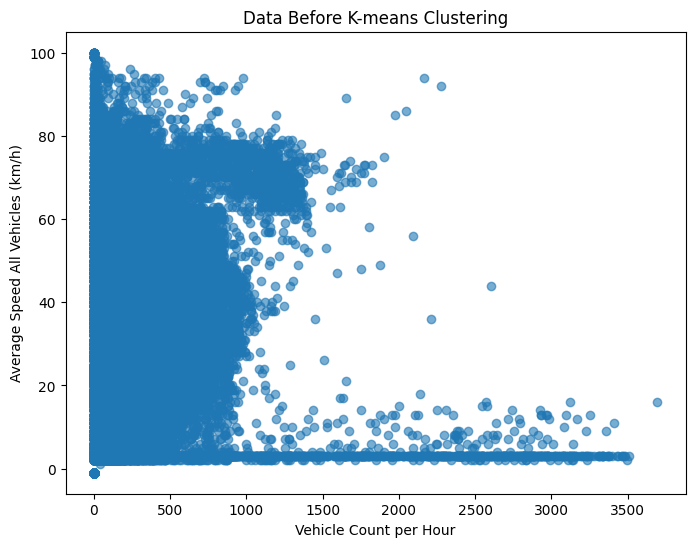

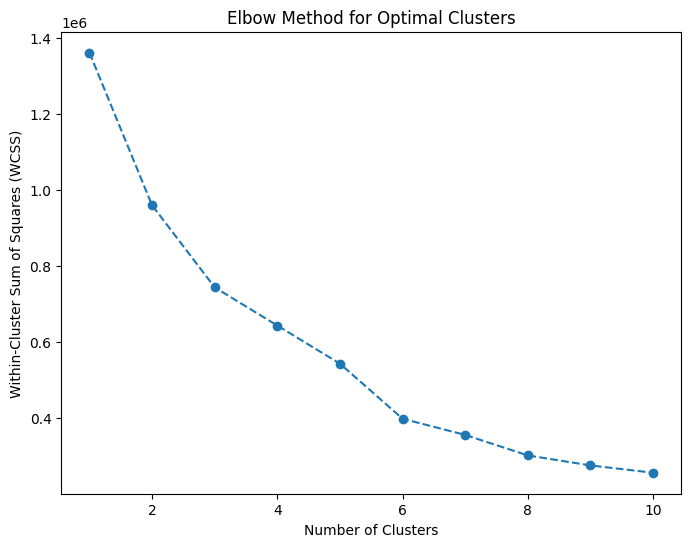

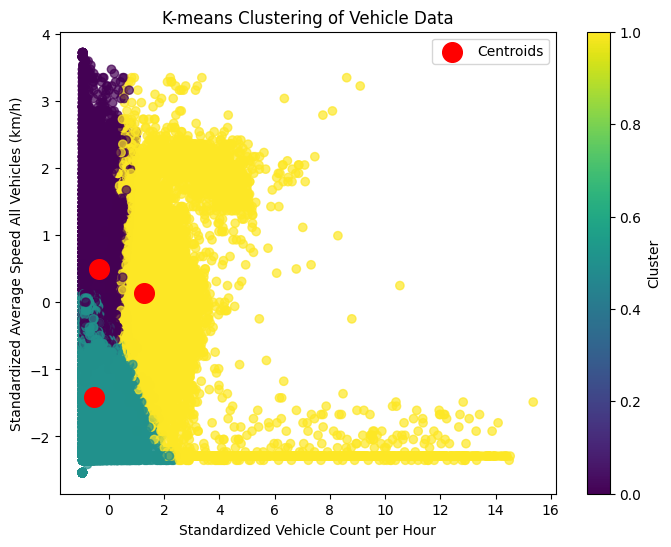

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = './berlin_traffic_data.csv'
berlin_traffic = pd.read_csv(file_path, sep=';', encoding='latin1')

# Display column names and first few rows
print("Dataset Columns:", berlin_traffic.columns)
print("First 5 Rows of Data:")
print(berlin_traffic.head())

# Select features for clustering
features = ['vehicle_count_per_hour', 'avg_speed_all_vehicles_kmh', 
            'car_count_per_hour', 'avg_speed_cars_kmh', 
            'truck_count_per_hour', 'avg_speed_trucks_kmh']
X = berlin_traffic[features]

# Visualize the data before clustering
plt.figure(figsize=(8, 6))
plt.scatter(berlin_traffic['vehicle_count_per_hour'], berlin_traffic['avg_speed_all_vehicles_kmh'], alpha=0.6)
plt.xlabel('Vehicle Count per Hour')
plt.ylabel('Average Speed All Vehicles (km/h)')
plt.title('Data Before K-means Clustering')
plt.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Train K-means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
berlin_traffic['cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=berlin_traffic['cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Standardized Vehicle Count per Hour')
plt.ylabel('Standardized Average Speed All Vehicles (km/h)')
plt.title('K-means Clustering of Vehicle Data')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()
